In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qick import QickConfig
from exp_handling.instrumentmanager import InstrumentManager
import experiments as meas
import config

%load_ext autoreload
%autoreload 2

# Configuration
ip = '10.108.30.23'

expt_path = 'C:\\_Data\\Terracat\\2025-04-28\\'
cfg_file='Terracat1.yml'

# Set seaborn color palette
colors = ["#0869c8", "#b51d14", '#ddb310', '#658b38', '#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

# Figure parameters
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 13})

print('Data will be stored in', expt_path)

# Results config file
cfg_path = os.path.join(os.getcwd(), 'configs', cfg_file)
auto_cfg = config.load(cfg_path)

# Connect to instruments
im = InstrumentManager(ns_address=ip)
print(im)
soc = QickConfig(im[auto_cfg['aliases']['soc']].get_cfg())
print(soc)

cfg_dict = {'soc': soc, 'expt_path': expt_path, 'cfg_file': cfg_path, 'im': im}


c:\_Lib\python\qq\slab_qick_calib\experiments\single_qubit\resonator_spectroscopy.py:291: SyntaxWarning: invalid escape sequence '\k'
  label = f"$\kappa$: {data['kappa']:.2f} MHz"
QICK library version mismatch: 0.2.316 remote (the board), 0.2.325 local (the PC)
                        This may cause errors, usually KeyError in QickConfig initialization.
                        If this happens, you must bring your versions in sync.


imported experiments.single_qubit.active_reset
imported experiments.single_qubit.inactive
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.rabi
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.single_shot
imported experiments.single_qubit.t1
imported experiments.single_qubit.t1_cont
imported experiments.single_qubit.t1_stark
imported experiments.single_qubit.t2
imported experiments.single_qubit.t2_echo
imported experiments.single_qubit.t2_ramsey
imported experiments.single_qubit.t2_ramsey_stark
imported experiments.single_qubit.tof_calibration
imported experiments.two_qubit.rabi_2q
imported experiments.two_qubit.t1_2q
imported experiments.two_qubit.t1_2q_cont
imported experiments.two_qubit.t1_2q_conttest
Data will be stored in C:\_Data\Terracat\2025-04-28\
{'Pyro.NameServer': <Pyro4.core.Proxy at 0x1dc020dfc20; not connected; for PYRO:Pyro.NameServer@10.108.30.23:9090>, 'bf1_soc': <Pyro4.core.Proxy at

## New direcotry

In [ ]:
import os
import config
new_config = False
new_folder = False
expt_path = 'C:\\_Data\\Terracat\\2025-04-28\\'
cfg_file='Terracat1.yml'

if new_config or new_folder:

    if new_config:
        config.init_config( os.getcwd() + '\\configs\\' + cfg_file, 8, type='full', aliases='bf1_soc', t1=30)

    if not os.path.exists(expt_path):
        os.makedirs(expt_path)
        os.mkdir(expt_path + 'images')
        os.mkdir(expt_path + 'images\\summary')

C:\_Data\Litten\2025-04-28\


## TOF

In [ ]:
qubit_list = np.arange(3)
qubit_list = [0]
for qi in qubit_list:  
        tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi)
        #tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi,params={'readout_length':13})#,params={'frequency':fi})
        # use this to set trig_offset in config file

  0%|          | 0/1500000 [00:00<?, ?it/s]

Number of peaks: 0


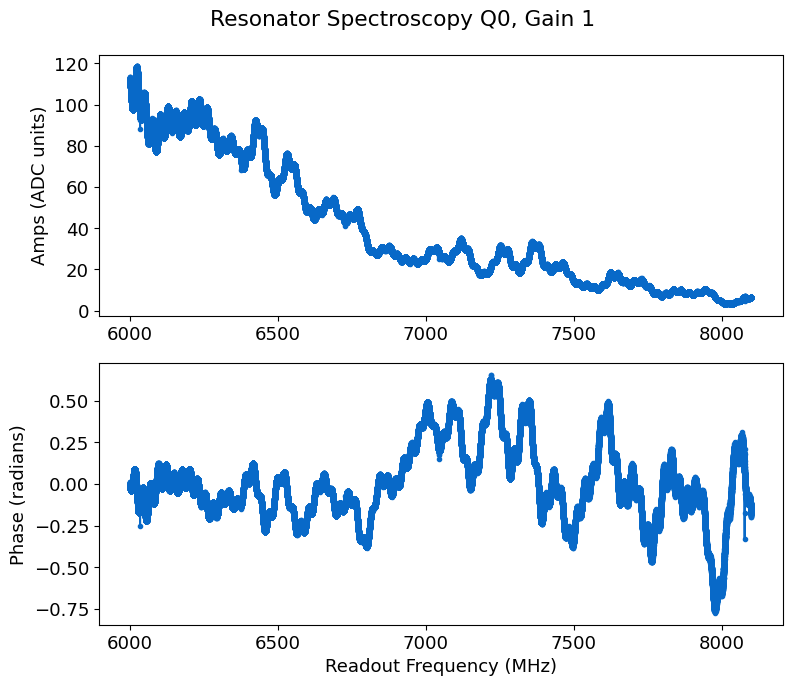

In [13]:
#rspec = cfg.make_rspec_coarse(soc, expt_path, cfg_path, i, im=im, start=6000, span=800, reps=2000, npts=5000)
qi=0
rspecc = meas.ResSpec(cfg_dict, qi=qi, style='coarse', params={'start':6000, 'span':2100, 'soft_avgs':1, 'reps':15, 'gain':1, 'expts':100000,'length':100})
res_values = rspecc.data['coarse_peaks']

Number of peaks: 16


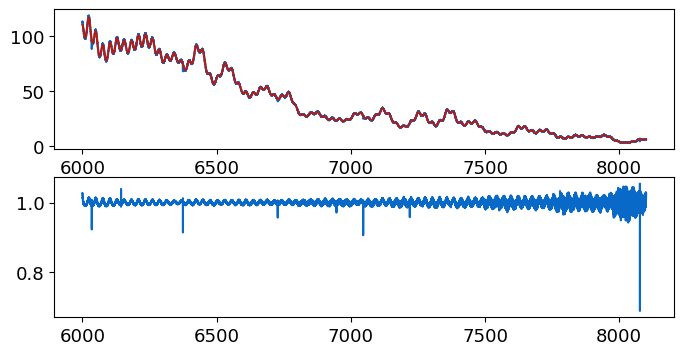

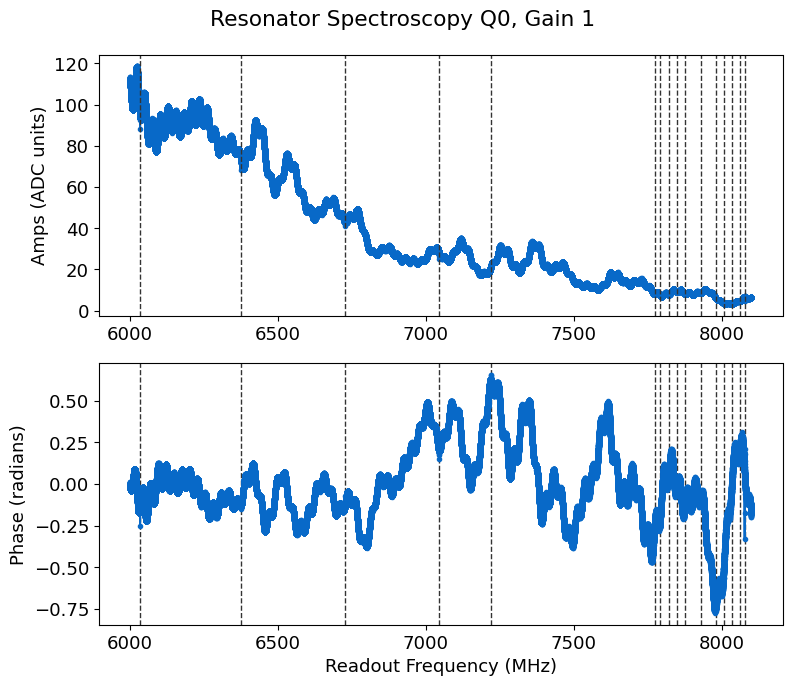

In [15]:
rspecc.analyze(peaks=True, debug=True, fit=False, prom=0.05)
rspecc.display(peaks=True, fit=False)
res_values = rspecc.data['coarse_peaks']

In [10]:
res_values = np.delete(res_values,1)

## Res fine

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


  0%|          | 0/11000 [00:00<?, ?it/s]

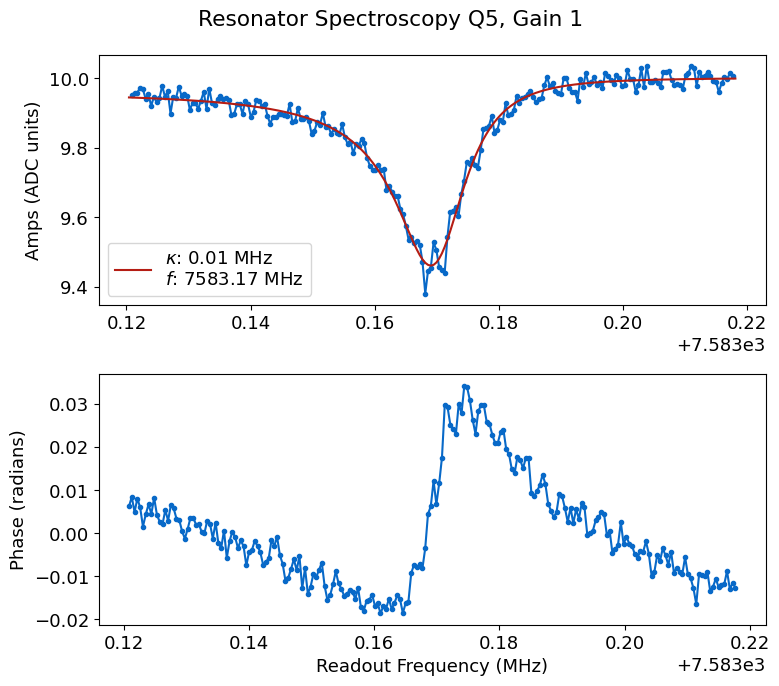

*Set cfg readout 5 frequency to 7583.1682 from 7583.1708*
*Set cfg readout 5 kappa to 0.0139 from 0.0144*
*Set cfg readout 5 qi to 57.8109 from 55.377*
*Set cfg readout 5 qe to 1029.2394 from 1018.1351*


In [ ]:
update=True

qubit_list = np.arange(7)
#qubit_list=[5]
for qi in qubit_list:    
    #rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':1, 'center':res_values[qi], 'gain':1,'reps':4,'length':300}) # Use this to sweep through the res_values list
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','reps':50,'gain':1,'length':300})
    #rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':1,'long_pulse':True,'gain':1,'length':400})
    if update: rspec.update(cfg_dict['cfg_file'])

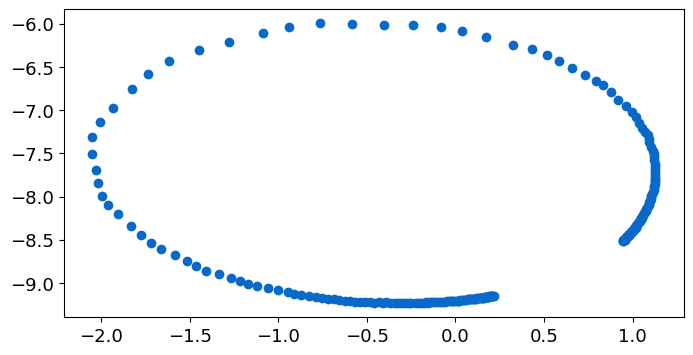

In [53]:
plt.figure()
fix_phase = np.unwrap(rspec.data['phases']-rspec.data['phases'][0])-fit_params[0]*rspec.data['xpts']
amps = rspec.data['amps']
x = amps*np.cos(fix_phase)
y = amps*np.sin(fix_phase)
plt.plot(x, y, 'o', label='raw data')

## Power sweep

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


1


  0%|          | 0/100 [00:00<?, ?it/s]

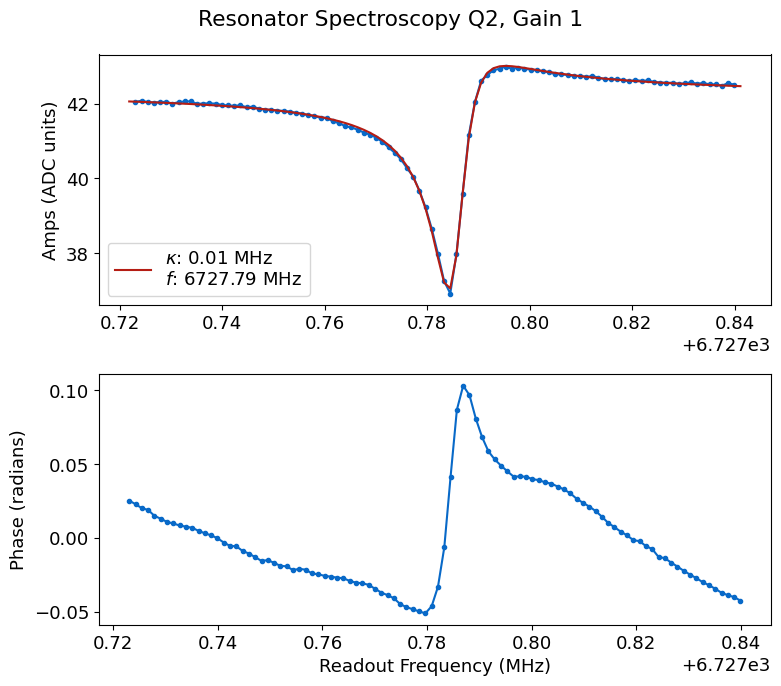

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 2 frequency to 6727.7845 from 6727.7817*
*Set cfg readout 2 kappa to 0.0076 from 0.0171*
*Set cfg readout 2 qi to 102.9611 from 42.3522*
*Set cfg readout 2 qe to 620.8625 from 547.3191*
2


  0%|          | 0/200 [00:00<?, ?it/s]

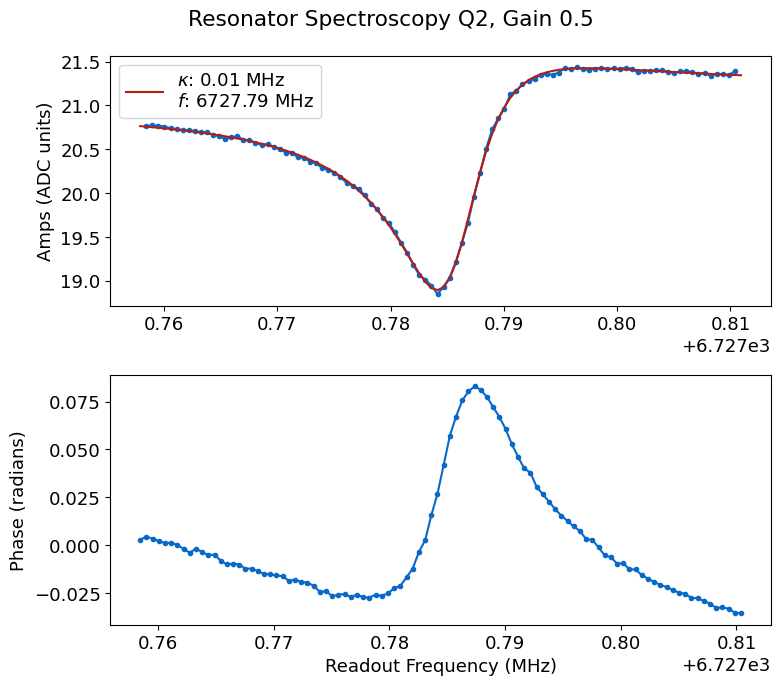

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 2 frequency to 6727.7841 from 6727.7845*
*Set cfg readout 2 kappa to 0.0089 from 0.0076*
*Set cfg readout 2 qi to 86.1765 from 102.9611*
*Set cfg readout 2 qe to 636.2062 from 620.8625*
3


  0%|          | 0/300 [00:00<?, ?it/s]

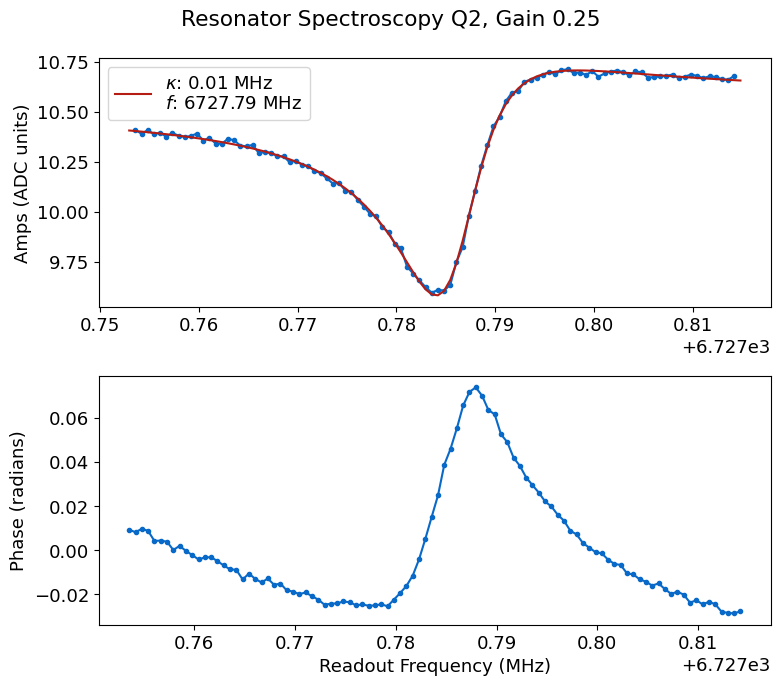

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 2 frequency to 6727.7836 from 6727.7841*
*Set cfg readout 2 kappa to 0.0102 from 0.0089*
*Set cfg readout 2 qi to 73.7313 from 86.1765*
*Set cfg readout 2 qe to 617.8968 from 636.2062*
6


  0%|          | 0/600 [00:00<?, ?it/s]

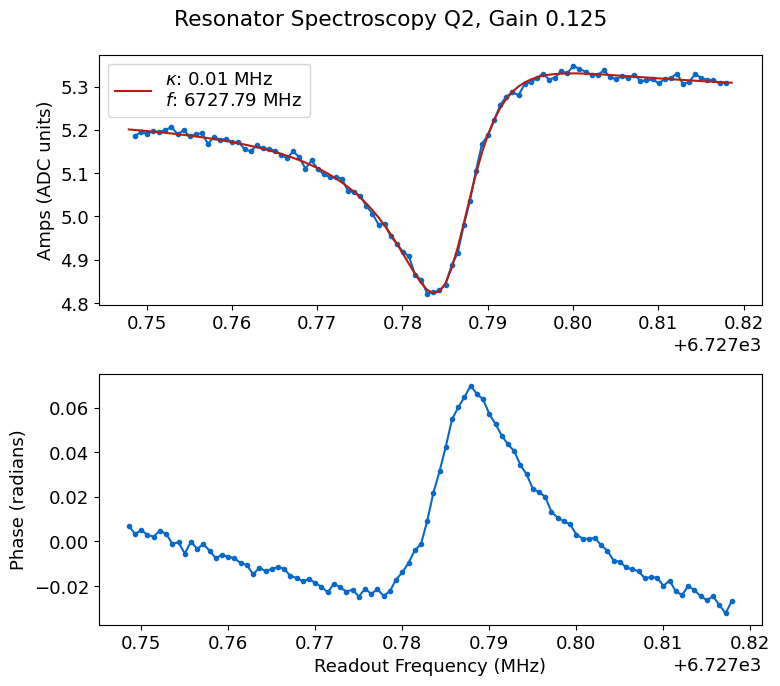

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 2 frequency to 6727.7829 from 6727.7836*
*Set cfg readout 2 kappa to 0.0112 from 0.0102*
*Set cfg readout 2 qi to 66.2451 from 73.7313*
*Set cfg readout 2 qe to 620.8376 from 617.8968*
12


  0%|          | 0/1200 [00:00<?, ?it/s]

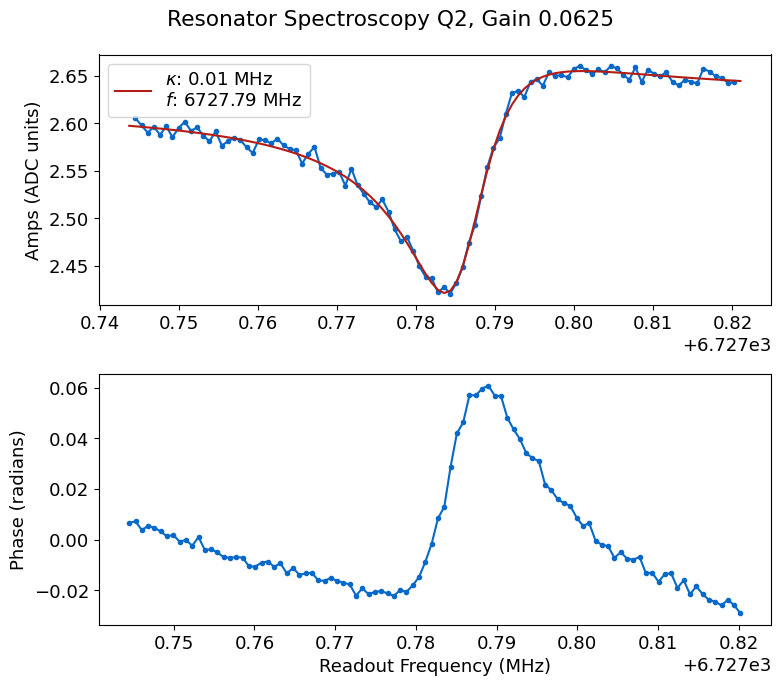

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 2 frequency to 6727.7843 from 6727.7829*
*Set cfg readout 2 kappa to 0.0122 from 0.0112*
*Set cfg readout 2 qi to 60.4148 from 66.2451*
*Set cfg readout 2 qe to 616.2367 from 620.8376*
23


  0%|          | 0/2300 [00:00<?, ?it/s]

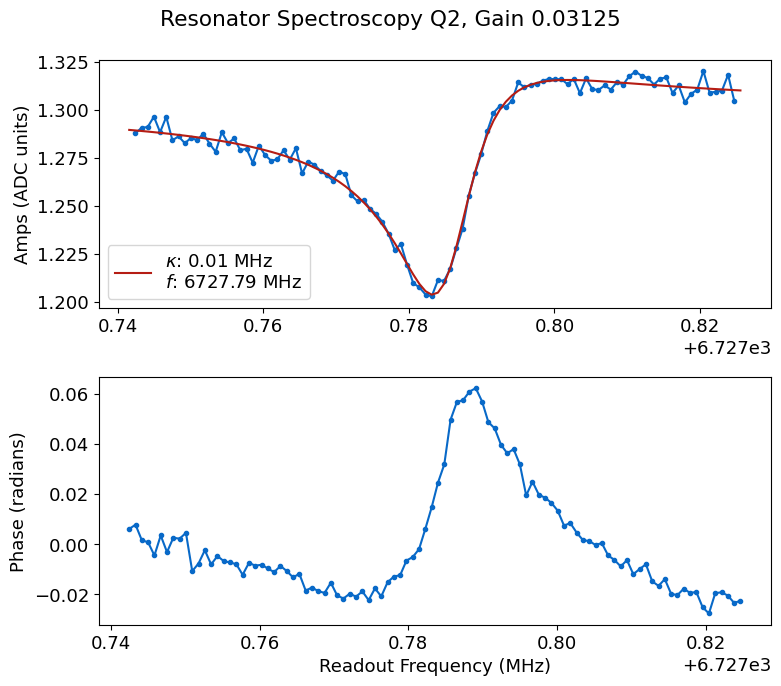

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 2 frequency to 6727.7831 from 6727.7843*
*Set cfg readout 2 kappa to 0.0129 from 0.0122*
*Set cfg readout 2 qi to 57.1624 from 60.4148*
*Set cfg readout 2 qe to 605.595 from 616.2367*
45


  0%|          | 0/4500 [00:00<?, ?it/s]

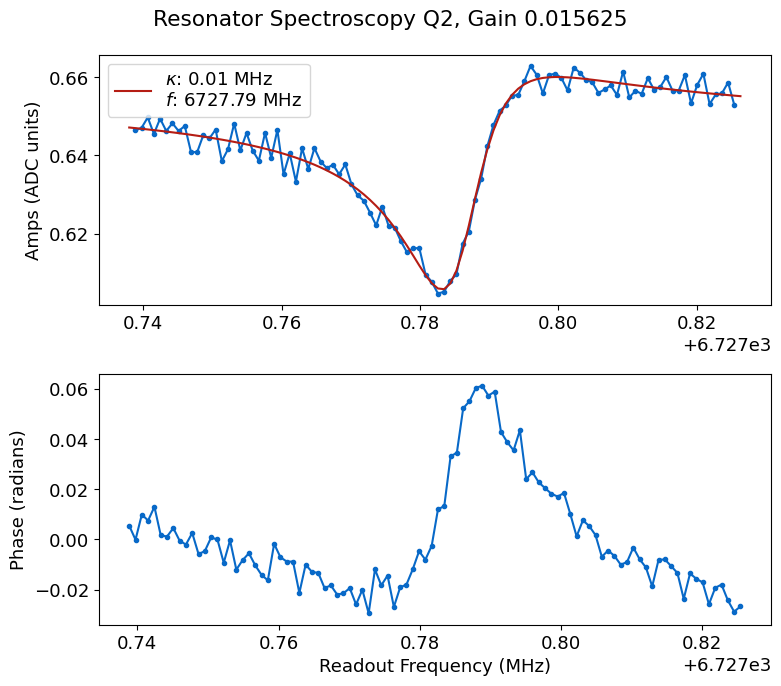

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 2 frequency to 6727.7826 from 6727.7831*
*Set cfg readout 2 kappa to 0.0131 from 0.0129*
*Set cfg readout 2 qi to 56.1745 from 57.1624*
*Set cfg readout 2 qe to 608.4285 from 605.595*
90


  0%|          | 0/9000 [00:00<?, ?it/s]

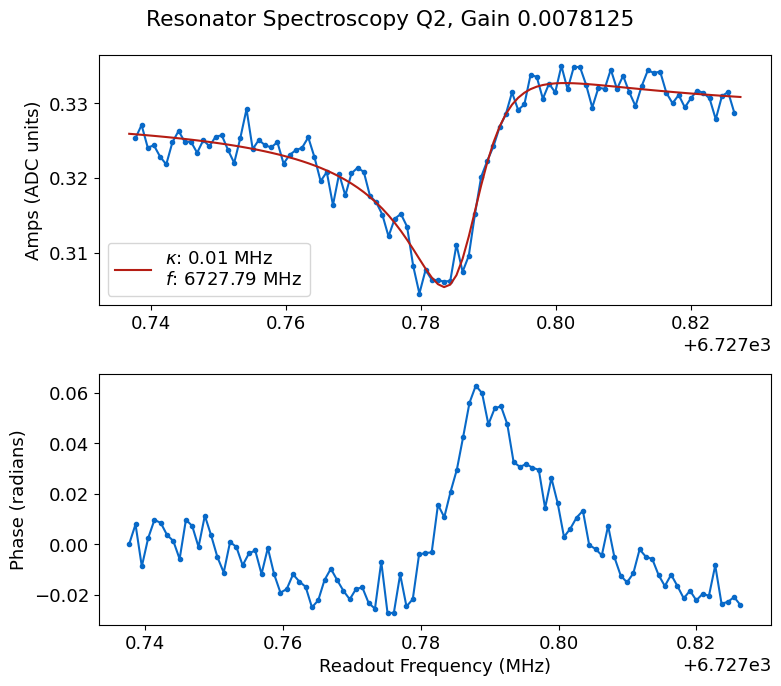

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 2 frequency to 6727.7798 from 6727.7826*
*Set cfg readout 2 kappa to 0.0133 from 0.0131*
*Set cfg readout 2 qi to 55.144 from 56.1745*
*Set cfg readout 2 qe to 605.1499 from 608.4285*
180


  0%|          | 0/18000 [00:00<?, ?it/s]

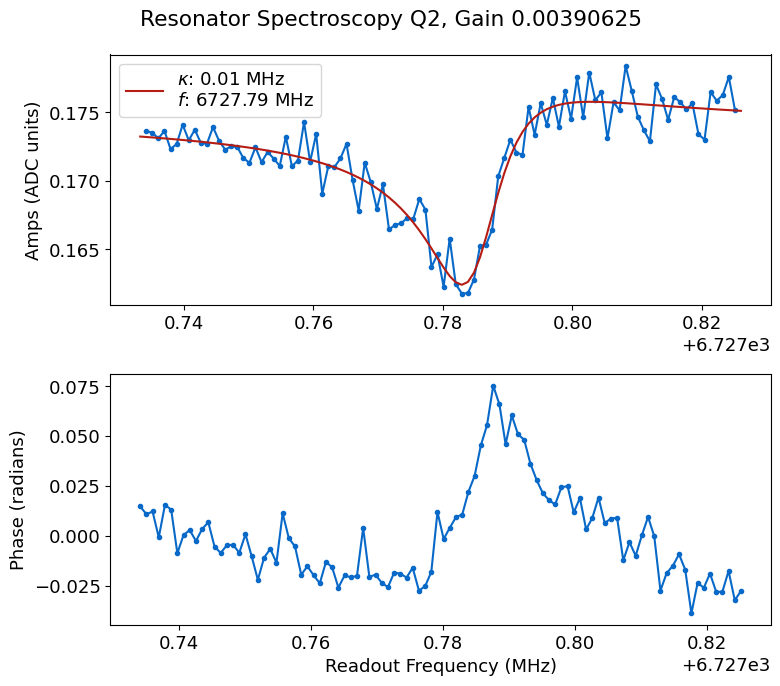

*Set cfg readout 2 frequency to 6727.7829 from 6727.7798*
*Set cfg readout 2 kappa to 0.0138 from 0.0133*
*Set cfg readout 2 qi to 52.9125 from 55.144*
*Set cfg readout 2 qe to 631.0624 from 605.1499*


With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


359


  0%|          | 0/35900 [00:00<?, ?it/s]

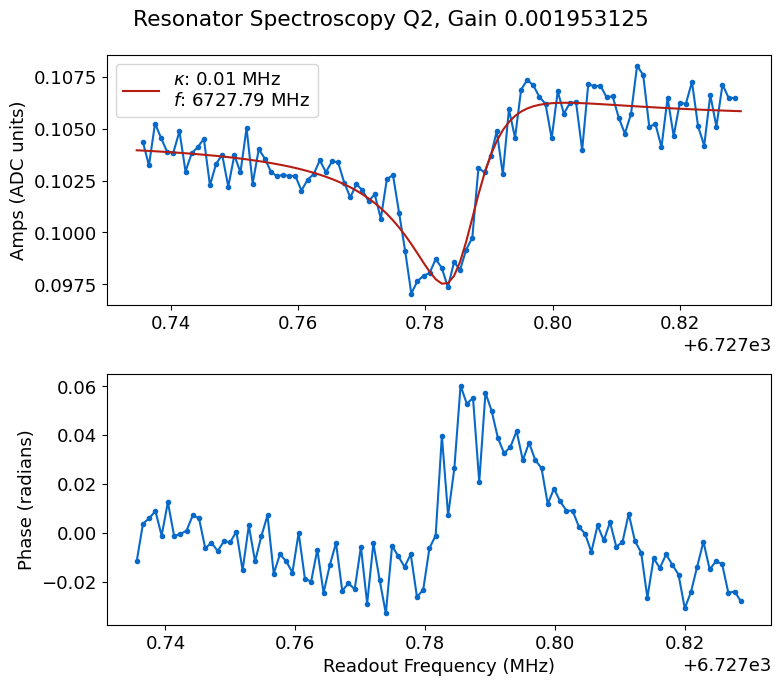

*Set cfg readout 2 frequency to 6727.7778 from 6727.7829*
*Set cfg readout 2 kappa to 0.0132 from 0.0138*
*Set cfg readout 2 qi to 55.5835 from 52.9125*
*Set cfg readout 2 qe to 616.1784 from 631.0624*


Text(0.5, 1.0, 'Resonator 2')

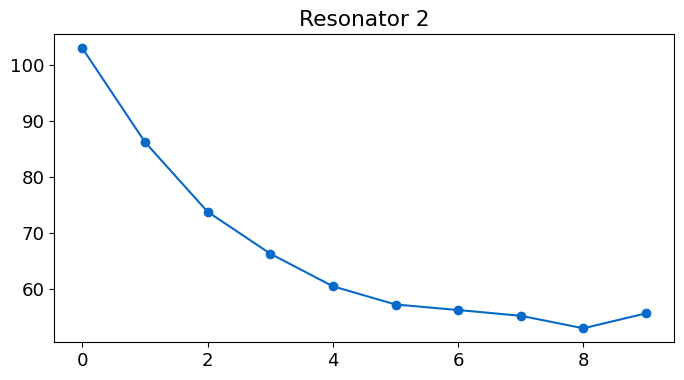

In [29]:
qi=2
qi_list=[]
gains = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
#gains = [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
d=[]
for i, g in enumerate(gains):
    reps = int(np.ceil(0.7*(2)**i))
    print(reps)
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','long_pulse':True,'reps':reps,'gain':g,'expts':100})
    rspec.update(cfg_dict['cfg_file'])
    d.append(rspec.data['amps'])
    qi_list.append(rspec.data['fit'][1])

plt.figure()
plt.plot(qi_list,'-o')
plt.title(f'Resonator {qi}')

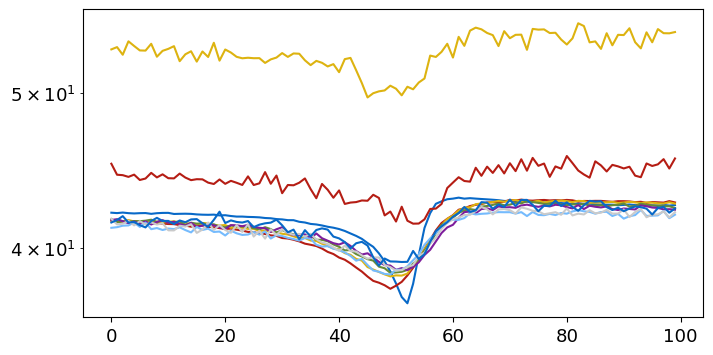

In [30]:
plt.figure()

for i, dd in enumerate(d): 
    plt.semilogy(dd*2**i)

Text(0.5, 1.0, 'Resonator 3')

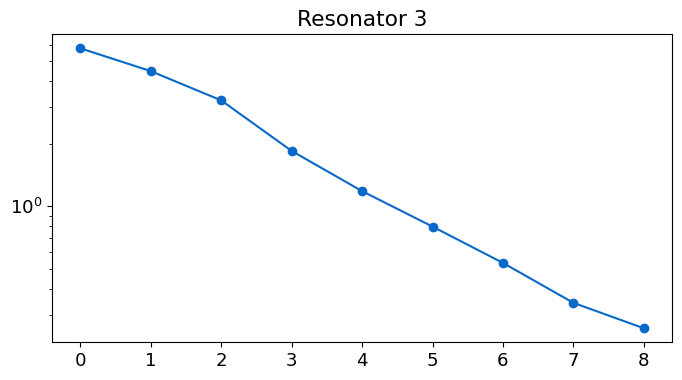

In [14]:
plt.figure()
plt.semilogy(np.array(qi_list[1:-1])*10/1000,'-o')
plt.title(f'Resonator {qi}')

# Check that reps don't change anygthing 

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


  0%|          | 0/100 [00:00<?, ?it/s]

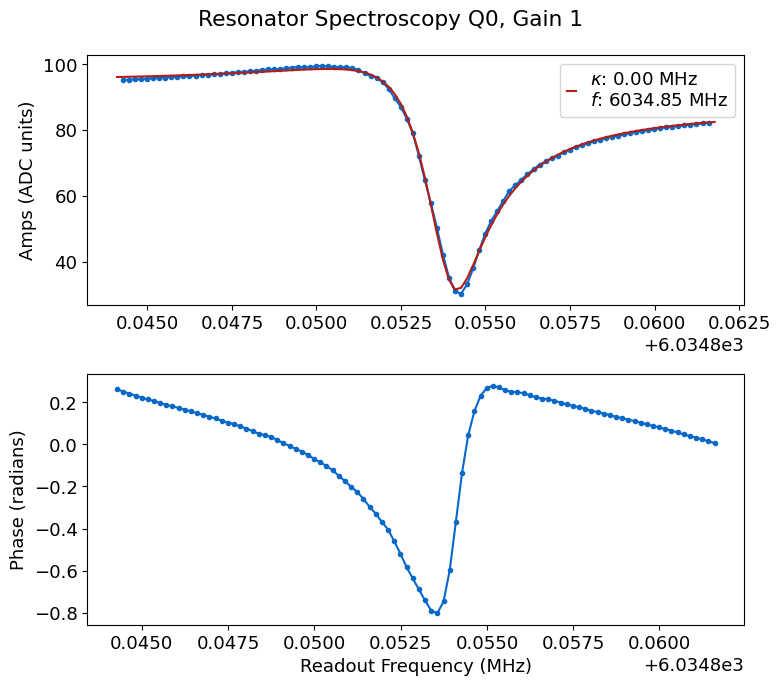

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 0 frequency to 6034.8543 from 6034.8539*
*Set cfg readout 0 kappa to 0.0027 from 0.0028*
*Set cfg readout 0 qi to 840.621 from 876.5098*
*Set cfg readout 0 qe to 301.4957 from 288.6927*


  0%|          | 0/200 [00:00<?, ?it/s]

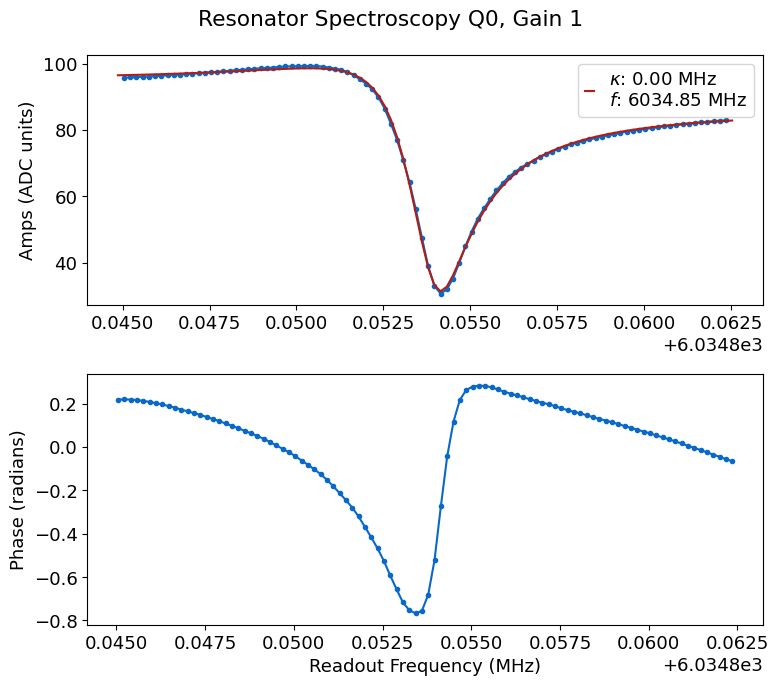

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 0 frequency to 6034.8541 from 6034.8543*
*Set cfg readout 0 kappa to 0.0027 from 0.0027*
*Set cfg readout 0 qi to 847.3901 from 840.621*
*Set cfg readout 0 qe to 304.5106 from 301.4957*


  0%|          | 0/500 [00:00<?, ?it/s]

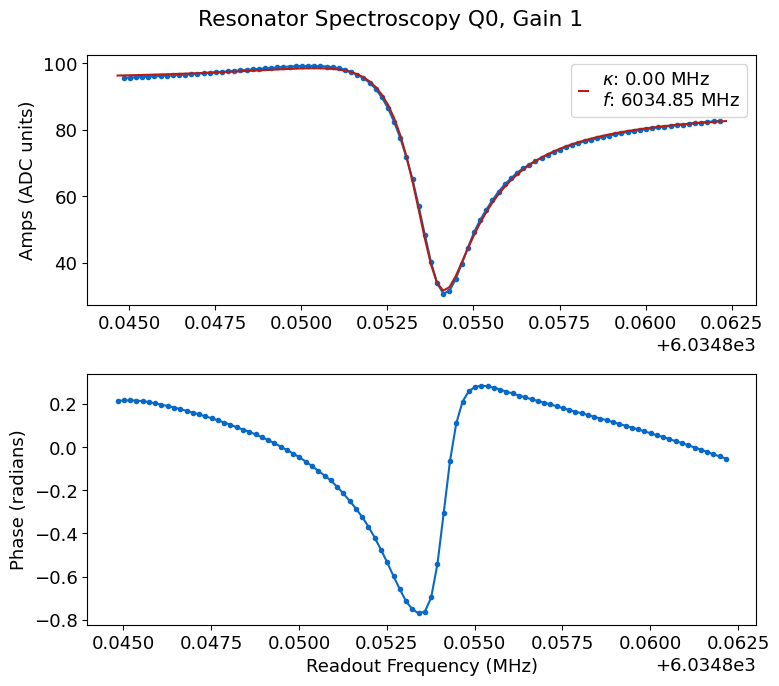

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 0 frequency to 6034.8541 from 6034.8541*
*Set cfg readout 0 kappa to 0.0027 from 0.0027*
*Set cfg readout 0 qi to 840.0998 from 847.3901*
*Set cfg readout 0 qe to 304.6814 from 304.5106*


  0%|          | 0/1000 [00:00<?, ?it/s]

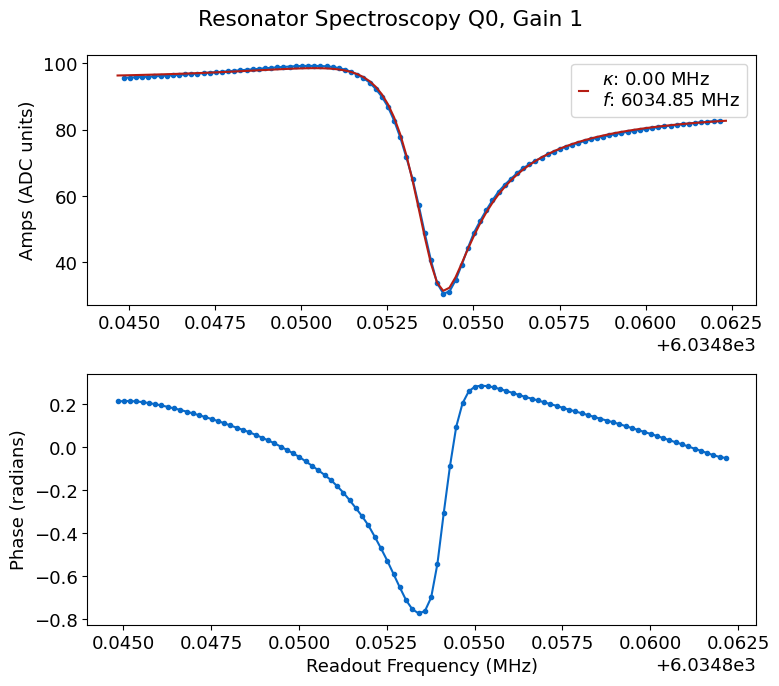

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 0 frequency to 6034.8541 from 6034.8541*
*Set cfg readout 0 kappa to 0.0027 from 0.0027*
*Set cfg readout 0 qi to 846.4944 from 840.0998*
*Set cfg readout 0 qe to 303.6878 from 304.6814*


  0%|          | 0/2000 [00:00<?, ?it/s]

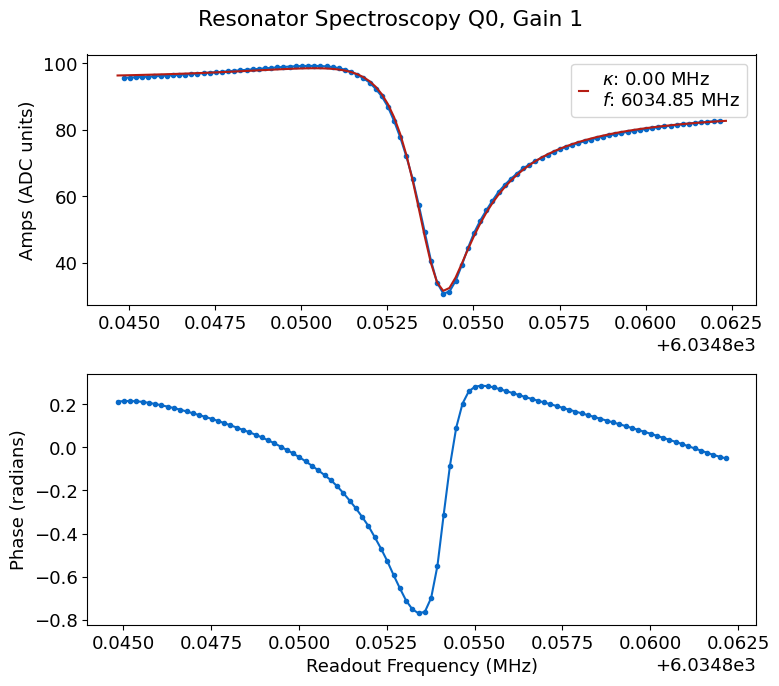

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


*Set cfg readout 0 frequency to 6034.8541 from 6034.8541*
*Set cfg readout 0 kappa to 0.0027 from 0.0027*
*Set cfg readout 0 qi to 844.3041 from 846.4944*
*Set cfg readout 0 qe to 303.703 from 303.6878*


  0%|          | 0/5000 [00:00<?, ?it/s]

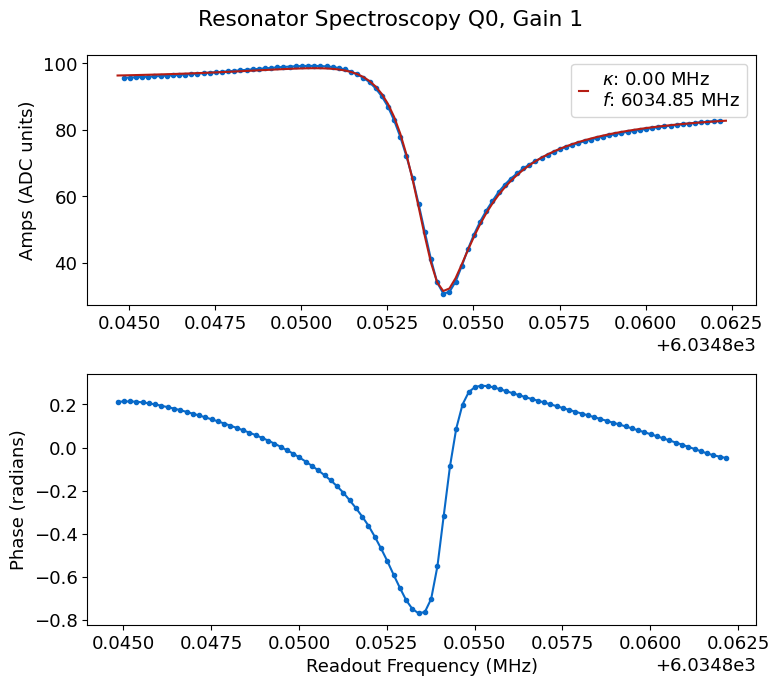

*Set cfg readout 0 frequency to 6034.8541 from 6034.8541*
*Set cfg readout 0 kappa to 0.0027 from 0.0027*
*Set cfg readout 0 qi to 845.4503 from 844.3041*
*Set cfg readout 0 qe to 303.3108 from 303.703*


Text(0.5, 1.0, 'Resonator 0')

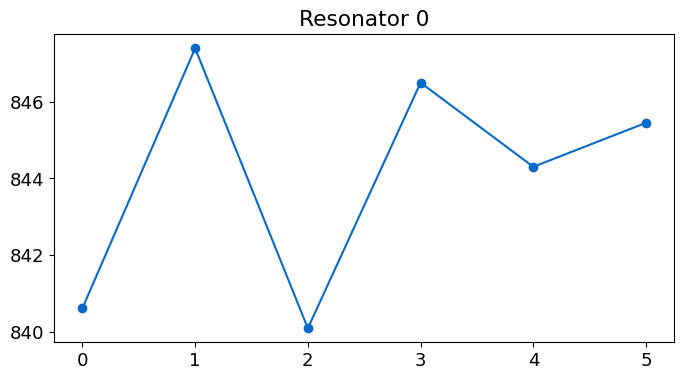

In [18]:
qi=0
qi_list=[]
reps = [1,2,5,10,20,50]
for i, r in enumerate(reps):

    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','long_pulse':True,'reps':r,'gain':1,'expts':100})
    rspec.update(cfg_dict['cfg_file'])
    qi_list.append(rspec.data['fit'][1])

plt.figure()
plt.plot(qi_list,'-o')
plt.title(f'Resonator {qi}')

In [ ]:
qi=0
qi_list=[]
length = [50,100,200,500,1000,2000,5000]
reps = [100,50,20,10,5,2,1]
for i, r in enumerate(reps):

    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','long_pulse':True,'reps':r,'gain':1,'expts':100})
    rspec.update(cfg_dict['cfg_file'])
    qi_list.append(rspec.data['fit'][1])

plt.figure()
plt.plot(qi_list,'-o')
plt.title(f'Resonator {qi}')

# Get data for the phase change

With the given readout length there is a possibility that the sum buffer will overflow giving invalid results.


  0%|          | 0/10000 [00:00<?, ?it/s]

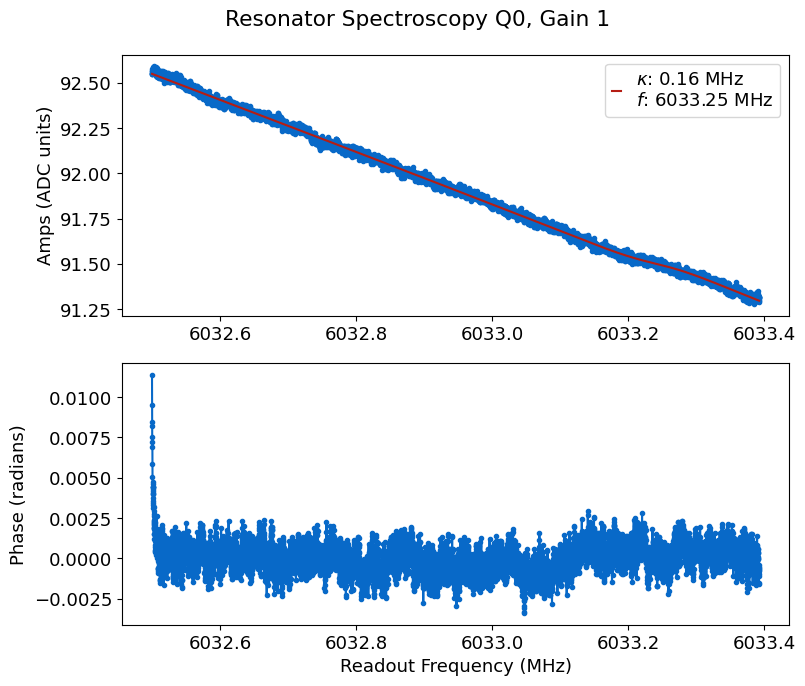

In [22]:

rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':1,'long_pulse':True,'reps':1,'gain':1,'expts':10000,'center':6033})


-1130.8379223790125

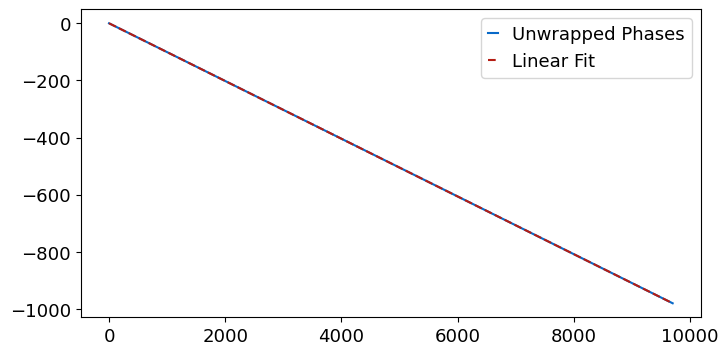

In [ ]:
plt.figure()
phases = np.unwrap(rspec.data['phases'][300:])
x = rspec.data['xpts'][300:]
fit_params = np.polyfit(x, phases, 1)
fit_line = np.polyval(fit_params, x)

plt.plot(phases, label='Unwrapped Phases')
plt.plot(fit_line, label='Linear Fit', linestyle='--')
plt.legend()

fit_params[0]
#-1130.8379223790125
